In [13]:
# Cell 1: Install required libraries
!pip install pandas seaborn matplotlib openpyxl --quiet


In [14]:
# Cell 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Cell 3: Load dataset with exact file path
file_path = '/content/IT Expenditure dataset.xlsx - Data.csv'

try:
    df = pd.read_excel(file_path, engine='openpyxl')
    print("Loaded as Excel file.")
except Exception as e:
    print("Excel file load failed:", e)
    try:
        df = pd.read_csv(file_path)
        print("Loaded as CSV file.")
    except Exception as e2:
        print("CSV file load failed:", e2)
        df = pd.DataFrame()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Excel file load failed: File is not a zip file
Loaded as CSV file.
Shape: (81610, 12)
Columns: ['Date', 'Business Area', 'Region', 'Country', 'IT Sub Area', 'IT Area', 'Cost element name', 'Cost Element Group', 'Cost Element Sub Group', 'Actual', 'Forecast', 'Plan']
  Date Business Area  Region         Country IT Sub Area     IT Area  \
0  Jan           R&D  Europe  United Kingdom    Planning  BU Support   
1  Jan           R&D  Europe  United Kingdom    Planning  BU Support   
2  Jan           R&D  Europe  United Kingdom    Planning  BU Support   
3  Jan           R&D  Europe  United Kingdom    Planning  BU Support   
4  Jan           R&D  Europe  United Kingdom    Planning  BU Support   

             Cost element name Cost Element Group Cost Element Sub Group  \
0                Other Inbound    Shared Services    Inbound Allocations   
1  Other Miscellaneous Expense              Other                  Other   
2  Other Miscellaneous Expense              Other                  Other

In [16]:
# Cell 4: Basic processing (convert columns, add calculations – no cleaning)

# Try converting 'Date' to a datetime, but don't drop anything
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='ignore')  # errors='ignore' prevents data loss

# Rename columns only if they exist
col_map = {
    'Actual': 'Actual Spending',
    'Forecast': 'Forecast',
    'Plan': 'Planned Budget'
}
for orig, new in col_map.items():
    if orig in df.columns:
        df.rename(columns={orig: new}, inplace=True)

# Calculate variance fields, only for rows where numbers exist
if {'Actual Spending','Planned Budget'}.issubset(df.columns):
    df['Variance'] = df['Actual Spending'] - df['Planned Budget']
    df['Variance %'] = df['Variance'] / df['Planned Budget'] * 100

print("Post-processing shape:", df.shape)
print(df.head())


Post-processing shape: (81610, 14)
  Date Business Area  Region         Country IT Sub Area     IT Area  \
0  Jan           R&D  Europe  United Kingdom    Planning  BU Support   
1  Jan           R&D  Europe  United Kingdom    Planning  BU Support   
2  Jan           R&D  Europe  United Kingdom    Planning  BU Support   
3  Jan           R&D  Europe  United Kingdom    Planning  BU Support   
4  Jan           R&D  Europe  United Kingdom    Planning  BU Support   

             Cost element name Cost Element Group Cost Element Sub Group  \
0                Other Inbound    Shared Services    Inbound Allocations   
1  Other Miscellaneous Expense              Other                  Other   
2  Other Miscellaneous Expense              Other                  Other   
3  Other Miscellaneous Expense              Other                  Other   
4   Regular Salaries And Wages              Labor         Internal Labor   

   Actual Spending  Forecast  Planned Budget  Variance  Variance %  
0     

/tmp/ipython-input-3310853207.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Date'] = pd.to_datetime(df['Date'], errors='ignore')  # errors='ignore' prevents data loss
/tmp/ipython-input-3310853207.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='ignore')  # errors='ignore' prevents data loss


In [17]:
# Cell 5: Summaries for visualization

# Monthly summary (if Date is present)
if 'Date' in df.columns and 'Planned Budget' in df.columns and 'Actual Spending' in df.columns and 'Variance' in df.columns:
    monthly_summary = df.groupby(df['Date'].astype(str))[['Planned Budget', 'Forecast', 'Actual Spending', 'Variance']].sum().reset_index()
else:
    monthly_summary = pd.DataFrame()

# Business Area summary
if 'Business Area' in df.columns and 'Variance' in df.columns:
    business_area_summary = df.groupby('Business Area')[['Planned Budget','Forecast','Actual Spending','Variance']].sum().reset_index()
else:
    business_area_summary = pd.DataFrame()

print("Monthly summary shape:", monthly_summary.shape)
print(monthly_summary.head())

print("Business area summary shape:", business_area_summary.shape)
print(business_area_summary.head())


Monthly summary shape: (12, 5)
  Date  Planned Budget      Forecast  Actual Spending  Variance
0  Apr     75495932.39  6.673136e+07      66731363.58       0.0
1  Aug     71123330.99  8.104238e+07      69830420.44       0.0
2  Dec     73041166.67  7.423453e+07             0.00       0.0
3  Feb     72896037.74  6.535462e+07      65354616.00       0.0
4  Jan     86708487.65  5.845974e+07      58459736.77       0.0
Business area summary shape: (7, 5)
             Business Area  Planned Budget      Forecast  Actual Spending  \
0                       BU    1.389179e+08  1.353855e+08     7.758322e+07   
1             Distribution    5.177806e+07  5.229326e+07     3.288215e+07   
2           Infrastructure    2.497641e+08  2.421848e+08     1.578148e+08   
3            Manufacturing    1.329863e+08  1.346530e+08     8.762577e+07   
4  Office & Administrative    1.728118e+08  1.724768e+08     1.112255e+08   

   Variance  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


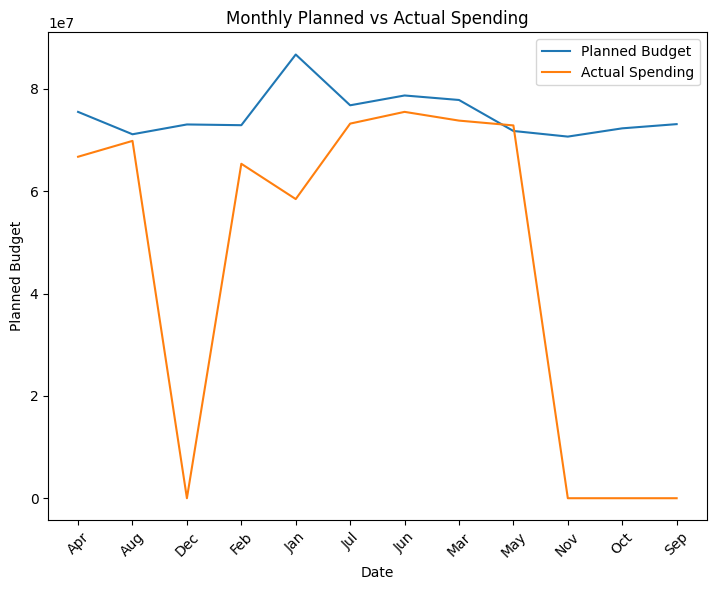

In [22]:
# Cell 6: Visualizations

plt.figure(figsize=(14, 6))

# Monthly Planned vs Actual Spending
if not monthly_summary.empty:
    plt.subplot(1,2,1)
    sns.lineplot(x='Date', y='Planned Budget', data=monthly_summary, label='Planned Budget')
    sns.lineplot(x='Date', y='Actual Spending', data=monthly_summary, label='Actual Spending')
    plt.title('Monthly Planned vs Actual Spending')
    plt.xticks(rotation=45)
    plt.legend()


plt.tight_layout()
plt.show()


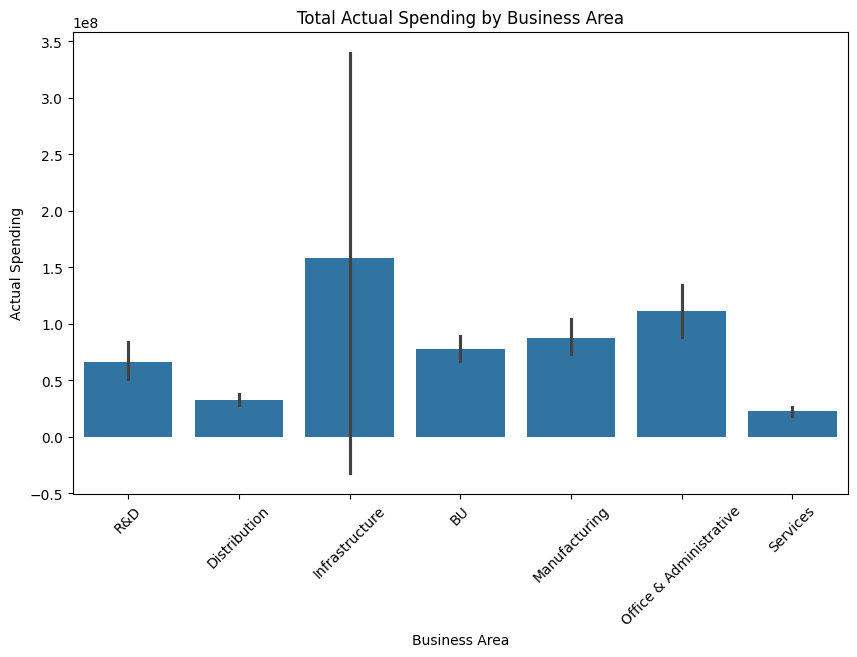

In [23]:
# Bar chart: Total Actual Spending by Business Area
plt.figure(figsize=(10, 6))
sns.barplot(x='Business Area', y='Actual Spending', data=df, estimator=sum)
plt.title('Total Actual Spending by Business Area')
plt.xticks(rotation=45)
plt.show()


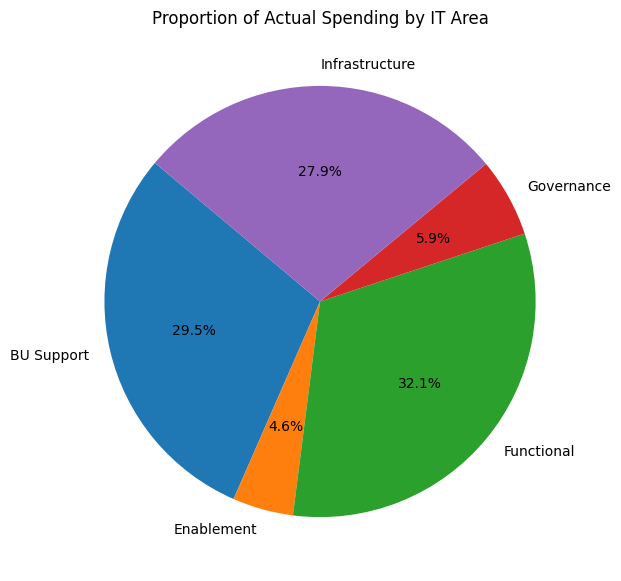

In [25]:
# Pie chart: Share of Actual Spending by IT Area
plt.figure(figsize=(7, 7))
spending_by_area = df.groupby('IT Area')['Actual Spending'].sum()
spending_by_area.plot.pie(autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Proportion of Actual Spending by IT Area')
plt.show()


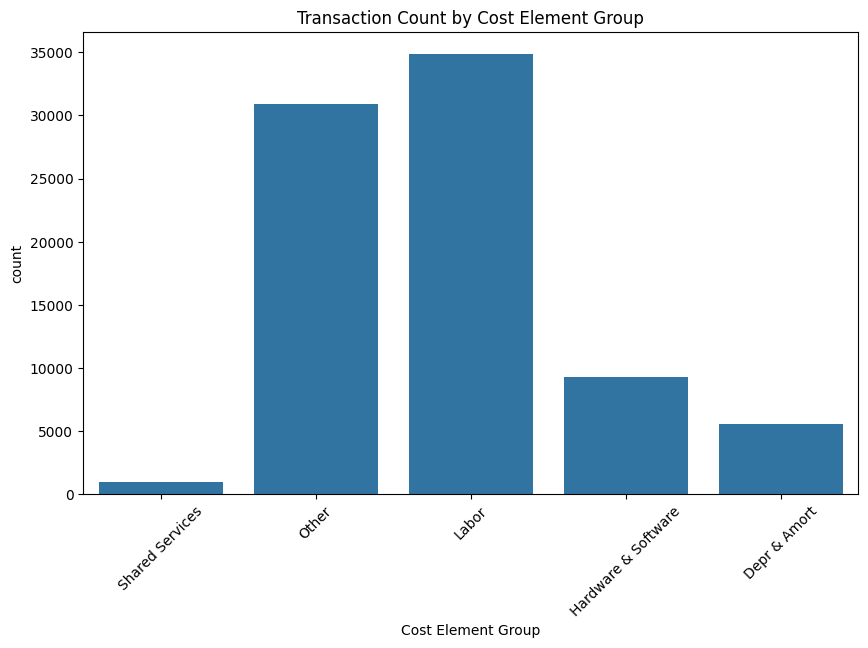

In [26]:
# Countplot: Number of Transactions (Rows) by Cost Element Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Cost Element Group', data=df)
plt.title('Transaction Count by Cost Element Group')
plt.xticks(rotation=45)
plt.show()
